## Dataset Description

In this challenge, we are given (simulated) manufacturing control data that can be clustered into different control states. Our task is to cluster the data into these control states. we are not given any training data, and  are not told how many possible control states there are. This is a completely unsupervised problem, one  might encounter in a real-world setting.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [4]:
df.drop("id",axis=1,inplace=True)

In [5]:
df.head()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,14,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,6,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,5,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,13,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,5,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_00    98000 non-null  float64
 1   f_01    98000 non-null  float64
 2   f_02    98000 non-null  float64
 3   f_03    98000 non-null  float64
 4   f_04    98000 non-null  float64
 5   f_05    98000 non-null  float64
 6   f_06    98000 non-null  float64
 7   f_07    98000 non-null  int64  
 8   f_08    98000 non-null  int64  
 9   f_09    98000 non-null  int64  
 10  f_10    98000 non-null  int64  
 11  f_11    98000 non-null  int64  
 12  f_12    98000 non-null  int64  
 13  f_13    98000 non-null  int64  
 14  f_14    98000 non-null  float64
 15  f_15    98000 non-null  float64
 16  f_16    98000 non-null  float64
 17  f_17    98000 non-null  float64
 18  f_18    98000 non-null  float64
 19  f_19    98000 non-null  float64
 20  f_20    98000 non-null  float64
 21  f_21    98000 non-null  float64
 22

In [7]:
df.describe()

,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,8.193163,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,5.904919,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,7.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,11.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,44.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


In [8]:
df.nunique()

f_00    98000
f_01    98000
f_02    98000
f_03    98000
f_04    98000
f_05    98000
f_06    98000
f_07       32
f_08       29
f_09       45
f_10       37
f_11       29
f_12       39
f_13       30
f_14    98000
f_15    98000
f_16    98000
f_17    98000
f_18    98000
f_19    98000
f_20    98000
f_21    98000
f_22    98000
f_23    98000
f_24    98000
f_25    98000
f_26    98000
f_27    98000
f_28    98000
dtype: int64

In [9]:
df.skew()

f_00    0.002451
f_01    0.005256
f_02   -0.010418
f_03    0.012110
f_04   -0.001219
f_05   -0.001270
f_06    0.013073
f_07    0.797179
f_08    0.545605
f_09    1.178944
f_10    0.780204
f_11    0.443713
f_12    0.949891
f_13    0.700749
f_14    0.009730
f_15    0.003195
f_16    0.005671
f_17    0.005593
f_18    0.000403
f_19   -0.006784
f_20    0.006275
f_21   -0.013077
f_22    0.052642
f_23   -0.014778
f_24    0.025077
f_25    0.083497
f_26    0.011036
f_27    0.095639
f_28    0.104729
dtype: float64

In [10]:
df.isnull().sum()

f_00    0
f_01    0
f_02    0
f_03    0
f_04    0
f_05    0
f_06    0
f_07    0
f_08    0
f_09    0
f_10    0
f_11    0
f_12    0
f_13    0
f_14    0
f_15    0
f_16    0
f_17    0
f_18    0
f_19    0
f_20    0
f_21    0
f_22    0
f_23    0
f_24    0
f_25    0
f_26    0
f_27    0
f_28    0
dtype: int64

IndexError: single positional indexer is out-of-bounds

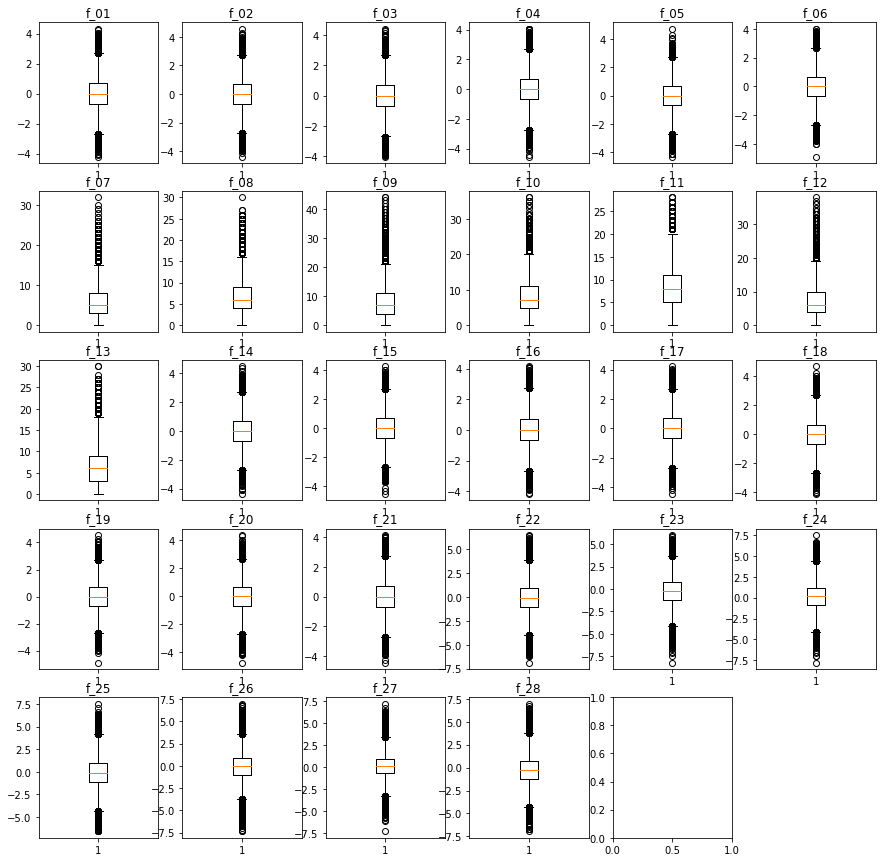

In [11]:
fig = plt.figure(figsize=(15,15))
for i in range(1,30): 
    plt.subplot(5, 6, i) 
    plt.boxplot(df.iloc[:,i]) 
    plt.title(df.columns[i])
fig.tight_layout()

IndexError: single positional indexer is out-of-bounds

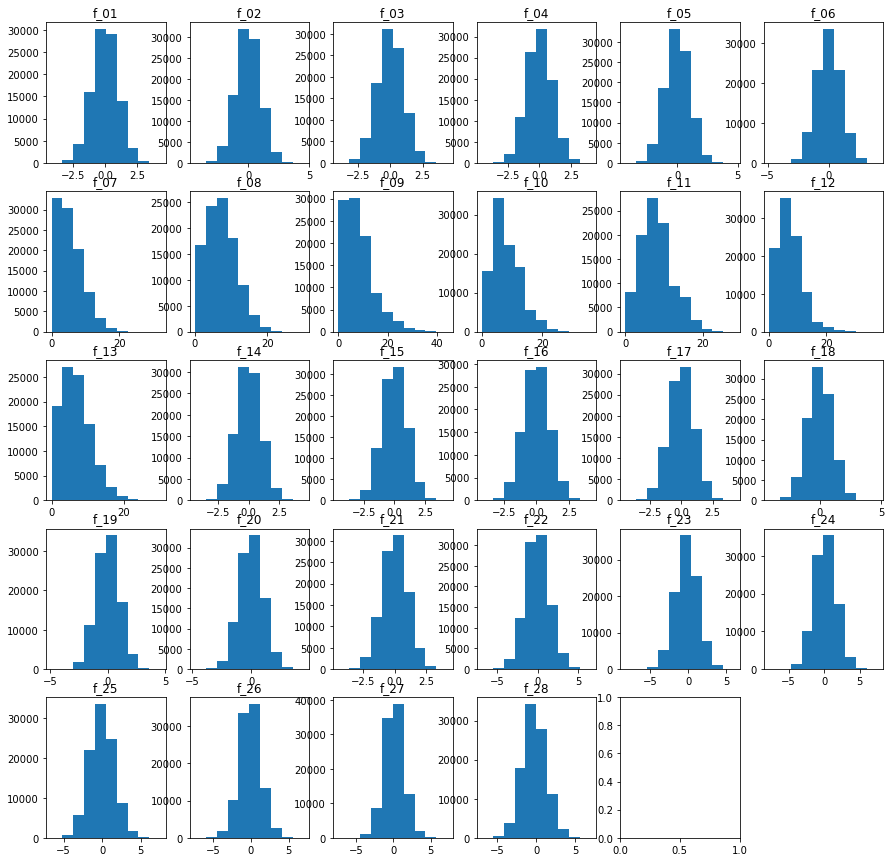

In [12]:
fig = plt.figure(figsize=(15,15))
for i in range(1,30): 
    plt.subplot(5, 6, i) 
    plt.hist(df.iloc[:,i]) 
    plt.title(df.columns[i])
fig.tight_layout()

In [16]:
#feature scaling
cols = df.columns
ms = MinMaxScaler()
df = ms.fit_transform(df)

In [17]:
df = pd.DataFrame(df,columns=[cols])
df.head()


,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0.470880,0.385799,0.562361,0.546940,0.431504,0.558689,0.804339,0.06250,0.433333,0.318182,...,0.467078,0.435327,0.428585,0.431881,0.656229,0.450930,0.546854,0.603894,0.605064,0.557570
1,0.438371,0.439604,0.562946,0.595238,0.335748,0.573136,0.540179,0.06250,0.100000,0.136364,...,0.472326,0.508380,0.309548,0.450616,0.608434,0.623499,0.446892,0.453613,0.543135,0.306763
2,0.600831,0.530897,0.358769,0.402646,0.540544,0.564273,0.773949,0.15625,0.366667,0.113636,...,0.473940,0.342750,0.656568,0.757268,0.570082,0.367093,0.397413,0.605750,0.428078,0.238558
3,0.458790,0.519696,0.519301,0.504429,0.576596,0.341746,0.565985,0.18750,0.066667,0.295455,...,0.583177,0.659253,0.579803,0.590711,0.433370,0.602681,0.331975,0.469007,0.500973,0.516282
4,0.440320,0.370937,0.459521,0.259276,0.494476,0.271661,0.638294,0.25000,0.233333,0.113636,...,0.345402,0.470595,0.555270,0.534534,0.405619,0.604864,0.392484,0.624310,0.476586,0.356527


In [18]:
#decomposing the dataset into 2 components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
pca_df.head()

,principal component 1,principal component 2
0,-0.139495,0.169942
1,-0.042608,-0.248885
2,-0.185803,-0.009531
3,0.146979,0.068348
4,-0.034731,-0.301604


In [19]:
#silhoutte method to obtain optimal no. of clusters for our dataset, higher value indicates optimal cluster
for i in range(2,10):
    labels=cluster.KMeans(n_clusters=i,random_state=200).fit(pca_df).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(pca_df,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.35194682705367725
Silhouette score for k(clusters) = 3 is 0.37128185998563334
Silhouette score for k(clusters) = 4 is 0.32706078415075174
Silhouette score for k(clusters) = 5 is 0.31963191992053064
Silhouette score for k(clusters) = 6 is 0.32696018073039884
Silhouette score for k(clusters) = 7 is 0.33544623683017044
Silhouette score for k(clusters) = 8 is 0.3328523404035035
Silhouette score for k(clusters) = 9 is 0.3310071032450494


In [21]:
#elbow method
K=range(2,10)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(pca_df)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

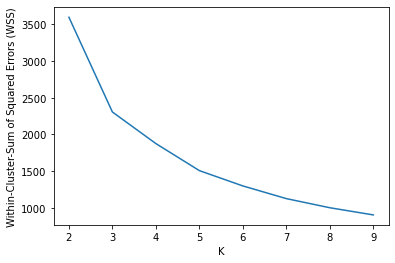

In [22]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss)

In [23]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans = kmeans.fit(pca_df)

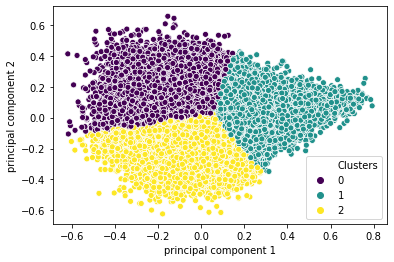

In [24]:
#plotting the clusters
pca_df['Clusters'] = kmeans.labels_
sns.scatterplot(x="principal component 1", y="principal component 2",hue = 'Clusters',  data=pca_df,palette='viridis')

In [25]:
df['Predicted'] = pd.Series(pca_df['Clusters'], index=df.index)
df.head()


,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,f_09,...,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,Predicted
0,0.470880,0.385799,0.562361,0.546940,0.431504,0.558689,0.804339,0.06250,0.433333,0.318182,...,0.435327,0.428585,0.431881,0.656229,0.450930,0.546854,0.603894,0.605064,0.557570,0
1,0.438371,0.439604,0.562946,0.595238,0.335748,0.573136,0.540179,0.06250,0.100000,0.136364,...,0.508380,0.309548,0.450616,0.608434,0.623499,0.446892,0.453613,0.543135,0.306763,2
2,0.600831,0.530897,0.358769,0.402646,0.540544,0.564273,0.773949,0.15625,0.366667,0.113636,...,0.342750,0.656568,0.757268,0.570082,0.367093,0.397413,0.605750,0.428078,0.238558,0
3,0.458790,0.519696,0.519301,0.504429,0.576596,0.341746,0.565985,0.18750,0.066667,0.295455,...,0.659253,0.579803,0.590711,0.433370,0.602681,0.331975,0.469007,0.500973,0.516282,1
4,0.440320,0.370937,0.459521,0.259276,0.494476,0.271661,0.638294,0.25000,0.233333,0.113636,...,0.470595,0.555270,0.534534,0.405619,0.604864,0.392484,0.624310,0.476586,0.356527,2
